# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/joseph/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc = newsapi.get_everything(
    q="Bitcoin OR BTC",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Bitcoin: {btc['totalResults']}")

Total articles about Bitcoin: 7114


In [5]:
# Fetch the Ethereum news articles
eth = newsapi.get_everything(
    q="Ethereum OR ETH",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Ethereum: {eth['totalResults']}")

Total articles about Ethereum: 3431


In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral", "text"]
btc_df = btc_df[cols]

btc_df.head()

,date,compound,positive,negative,neutral,text
0,2022-02-28,-0.2732,0.000,0.062,0.938,"LONDON, Feb 28 (Reuters) - Trading volumes bet..."
1,2022-03-04,-0.1280,0.000,0.046,0.954,"LONDON, March 4 (Reuters) - Cryptocurrencies h..."
2,2022-02-26,-0.4588,0.000,0.083,0.917,Illustration by James Bareham / The Verge\r\n\...
3,2022-02-17,0.7351,0.147,0.000,0.853,"Even in cyberspace, the Department of Justice ..."
4,2022-02-13,-0.3400,0.057,0.118,0.825,The couple would never flee from the country a...


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral", "text"]
eth_df = eth_df[cols]

eth_df.head()

,date,compound,positive,negative,neutral,text
0,2022-02-17,-0.2498,0.000,0.059,0.941,"Technical analysis isnt a perfect tool, but it..."
1,2022-02-26,-0.4588,0.000,0.083,0.917,Illustration by James Bareham / The Verge\r\n\...
2,2022-02-17,0.2263,0.056,0.000,0.944,"Last night, Twitter announced itll allow users..."
3,2022-03-01,-0.3182,0.059,0.093,0.848,"In February, shit hit the fan in the usual way..."
4,2022-02-23,0.2023,0.073,0.050,0.877,"Like the PlayStation 5 before it, Sony has eke..."


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,-0.013467,0.064910,0.064510,0.870570
std,0.469925,0.061315,0.073734,0.084279
min,-0.895700,0.000000,0.000000,0.627000
25%,-0.350450,0.000000,0.000000,0.822750
50%,0.000000,0.057000,0.053500,0.874500
75%,0.361200,0.102500,0.106250,0.935000
max,0.848100,0.282000,0.269000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.161779,0.085900,0.044410,0.869690
std,0.443335,0.070271,0.062635,0.083678
min,-0.872000,0.000000,0.000000,0.676000
25%,-0.064375,0.040750,0.000000,0.820750
50%,0.177900,0.073000,0.000000,0.868000
75%,0.514625,0.133500,0.070750,0.929000
max,0.918600,0.290000,0.255000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had a highest mean positive score of 0.082400, vs Bitcoin's 0.068880

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score with a max of 0.918600, vs Bitcoin's 0.907900

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score with a max of 0.292000, vs Ethereum's 0.290000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/joseph/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2022-02-28,-0.2732,0.000,0.062,0.938,"LONDON, Feb 28 (Reuters) - Trading volumes bet...","[london, feb, reuters, trading, volume, russia..."
1,2022-03-04,-0.1280,0.000,0.046,0.954,"LONDON, March 4 (Reuters) - Cryptocurrencies h...","[london, march, reuters, cryptocurrencies, clo..."
2,2022-02-26,-0.4588,0.000,0.083,0.917,Illustration by James Bareham / The Verge\r\n\...,"[illustration, james, bareham, verge, million,..."
3,2022-02-17,0.7351,0.147,0.000,0.853,"Even in cyberspace, the Department of Justice ...","[even, cyberspace, department, justice, able, ..."
4,2022-02-13,-0.3400,0.057,0.118,0.825,The couple would never flee from the country a...,"[couple, would, never, flee, country, risk, lo..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2022-02-17,-0.2498,0.000,0.059,0.941,"Technical analysis isnt a perfect tool, but it...","[technical, analysis, isnt, perfect, tool, may..."
1,2022-02-26,-0.4588,0.000,0.083,0.917,Illustration by James Bareham / The Verge\r\n\...,"[illustration, james, bareham, verge, million,..."
2,2022-02-17,0.2263,0.056,0.000,0.944,"Last night, Twitter announced itll allow users...","[last, night, twitter, announced, itll, allow,..."
3,2022-03-01,-0.3182,0.059,0.093,0.848,"In February, shit hit the fan in the usual way...","[february, shit, hit, fan, usual, way, old, tw..."
4,2022-02-23,0.2023,0.073,0.050,0.877,"Like the PlayStation 5 before it, Sony has eke...","[like, playstation, sony, ha, eked, specificat..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Create function to get token list from dataframe column 'tokens'
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens

# btc_tokens = [btc_tokens.append(token) for token in btc_df['tokens']]

# for token in btc_df['tokens']:
 # btc_tokens.append(token)

# eth_tokens = []
# for token in eth_df['tokens']:
   # eth_tokens.append(token)

# Create tokens lists for each
btc_tokens = get_tokens(btc_df)

eth_tokens = get_tokens(eth_df)

In [17]:
# Generate the Bitcoin N-grams where N=2
btc_ngram_counts = Counter(ngrams(btc_tokens, n=2))


In [18]:
# Generate the Ethereum N-grams where N=2
eth_ngram_counts = Counter(ngrams(eth_tokens, n=2))

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
btc_top10 = token_count(btc_tokens)
btc_top10

[('char', 100),
 ('bitcoin', 35),
 ('ha', 27),
 ('reuters', 20),
 ('crypto', 18),
 ('cryptocurrency', 17),
 ('feb', 14),
 ('us', 14),
 ('cryptocurrencies', 12),
 ('russia', 11)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
eth_top10 = token_count(eth_tokens)
eth_top10

[('char', 99),
 ('ha', 25),
 ('cryptocurrency', 19),
 ('market', 17),
 ('cryptocurrencies', 15),
 ('ethereum', 14),
 ('nft', 13),
 ('digital', 13),
 ('crypto', 12),
 ('ukraine', 11)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

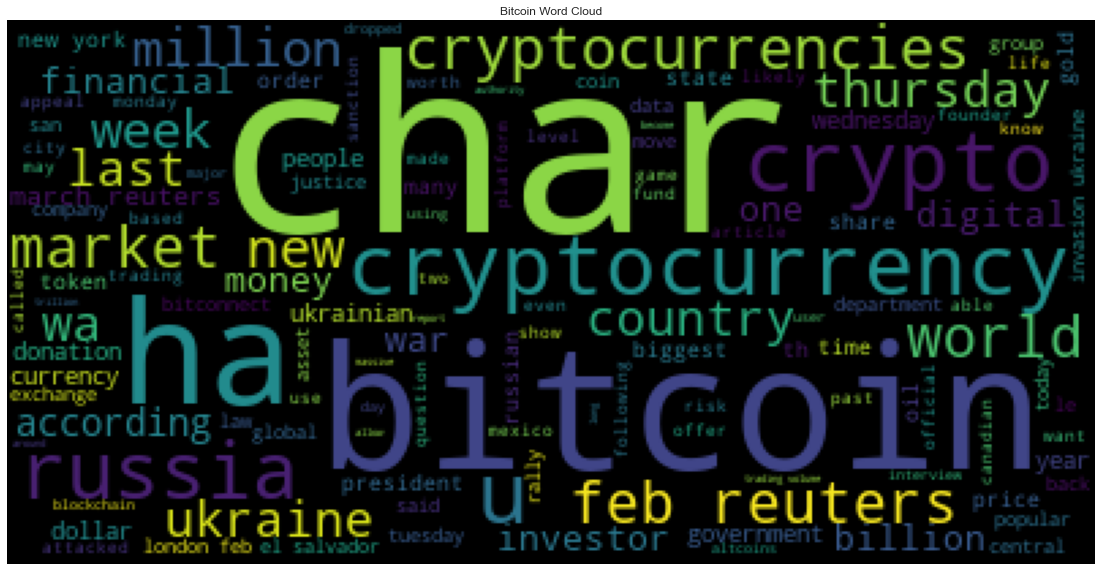

In [23]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud')
plt.axis("off");

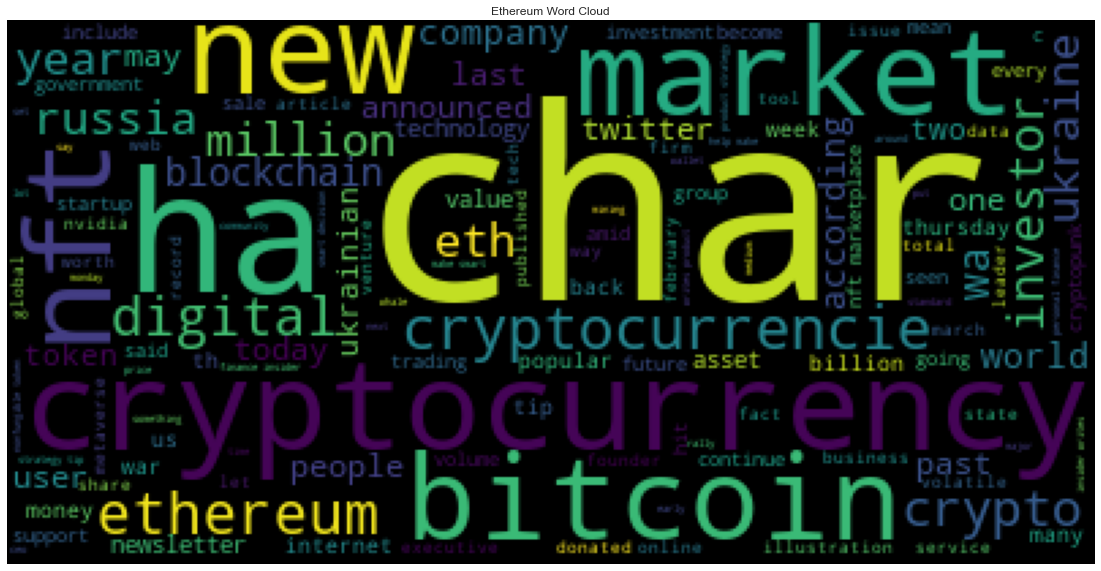

In [24]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud')
plt.axis("off");

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm
import en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_df['text'])

In [29]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [30]:
# Render the visualization
displacy.render(doc, style='ent')

In [31]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

LONDON GPE
Feb 28 DATE
Reuters ORG
Russian NORP
Tether ORG
Monday DATE
LONDON GPE
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
James Bareham PERSON
More than $15 million MONEY
More than $15 million MONEY
Ukrainian GPE
Russia GPE
the Department of Justice ORG
Monaco PERSON
Al Capone LOC
Margaret Lynaugh PERSON
Russia GPE
Ukraine GPE
2,000 MONEY
Monday DATE
August 2020 DATE
Palladium ORG
today DATE
the Data Summit ORG
March 9th DATE
Sadie Williamson PERSON
Williamson Fintech Consulting ORG
Sundays Super Bowl EVENT
Larry David PERSON
LeBron James PERSON
+3454 ORG
one CARDINAL
Tuesday DATE
$4.5 billion MONEY
Ukraine GPE
Kyiv GPE
Mykhailo Fedoro PERSON
Lichtensteins PERSON
Feb. 1 DATE
roughly $3.6 billion MONEY
the New York Times ORG
Feb 22 DATE
Reuters ORG
2021 DATE
thousands CARDINAL
March 1 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Satoshi Nakamoto PERSON
2008 DATE
Getty
Welcome to ORG
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NO

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_df['text'])

In [33]:
# Run the NER processor on all of the text
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [34]:
# Render the visualization
displacy.render(doc, style='ent')

In [35]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Ethereum ORG
ETH-USD ORG
Crypto PERSON
James Bareham PERSON
More than $15 million MONEY
More than $15 million MONEY
Ukrainian GPE
Russia GPE
Last night TIME
Twitter PRODUCT
Ethereum ORG
second ORDINAL
two months DATE
NFT ORG
February DATE
Ethereum Name Service ORG
ENS ORG
May 201 DATE
Sony ORG
today DATE
the Data Summit ORG
March 9th DATE
Sadie Williamson PERSON
Williamson Fintech Consulting ORG
Ukraine GPE
Kyiv GPE
Mykhailo Fedoro PERSON
more than rubles MONEY
Ukraine GPE
Mykhailo Fedorov PERSON
today DATE
Ukraine GPE
Russ ORG
Colorado GPE
the middle of this year DATE
US GPE
Jared Polis PERSON
Coinbase PERSON
last year DATE
Between 2020 and 2021 DATE
Twitter PRODUCT
TWTR ORG
-2.03% PERCENT
Ethereum ORG
+1.92% PERCENT
Wednesday DATE
Twitters Tips ORG
2022 DATE
Facebook ORG
Microsoft ORG
The Massachusetts Institute of Technology ORG
MIT ORG
2022 DATE
Ethereum ORG
MIT ORG
+3186 ORG
724,948 CARDINAL
tomorrow DATE
over two hours TIME
YouTube ORG
Waka Flacka Fla ORG
Nvidia PERSON
GeForce OR

---